# Import Libraries

Start off by importing the necessary libraries

In [156]:
#Import standard libraries
import numpy as np
import pandas as pd

#Import Data Visualizations libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Import Mutual Information
from sklearn.feature_selection import mutual_info_classif

#Import Random Forest Classifier and Other Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Import Model Validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Setup Complete")

Setup Complete


# Load the Data and Extract the Features and Target variables.

In [157]:
#Read the file into a variable train and test
train = pd.read_csv("../Airline Passanger Satisfaction/train.csv", index_col=0)
test = pd.read_csv("../Airline Passanger Satisfaction/train.csv", index_col=0)

In [158]:
#Extract features and target variable

features = train.drop(['satisfaction'], axis=1)
target = train['satisfaction']

Print the first five rows of the features data

In [159]:
#Print the first 5 rows of the features data
features.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,5,4,3,4,4,5,5,25,18.0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,1,5,3,1,4,1,1,6.0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


Print the summary of the features data

In [160]:
#Print the summary of the features data
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

# Data Visualization

Find any patterns, trends and outliers through visualization

In [161]:
#Function to create Bar Charts
def bar_graph(var, title, x_label, y_label):
    sns.set_style("darkgrid")
    plt.figure(figsize=(14,6))
    plt.title(title)
    plt.ylabel(x_label)
    plt.xlabel(y_label)
    new_var = var.value_counts()
    sns.barplot(x=new_var.index, y=new_var.values)
    plt.show()

In [162]:
#Function to create Categorical Scatter Plot
def cat_scat_plot(var1, var2, title, hue):
    sns.set_style("darkgrid")
    plt.figure(figsize=(14,6))
    plt.title(title)
    sns.swarmplot(x=var1[:1000], y=var2[:1000], hue=hue)
    plt.show()

In [163]:
#Function to create a Scatter Plot
def scatter_plot(data,var1,var2, title, hue):
    sns.set_style("darkgrid")
    plt.figure(figsize=(14,6))
    plt.title(title)
    sns.scatterplot(data=data[:1000],x=var1,y=var2, hue=hue)
    plt.show()

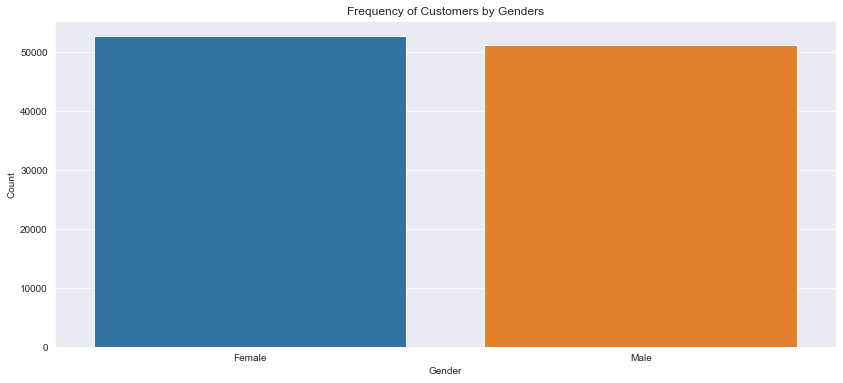

In [164]:
#Barplot for number of customers by Gender
bar_graph(features['Gender'], 'Frequency of Customers by Genders', 'Count', 'Gender')

The Frequency of Customers by Genders bar chart displays more females customers compared to males flying.

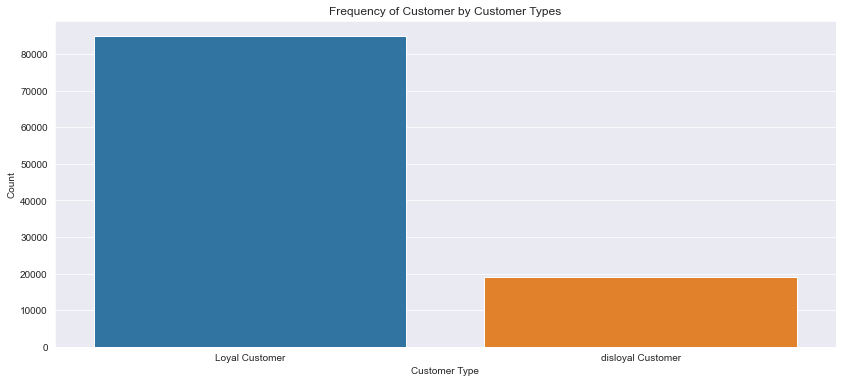

In [165]:
#Barplot for number of customers by Customer Type
bar_graph(features['Customer Type'], 'Frequency of Customer by Customer Types', 'Count', 'Customer Type')

The Frequency of Customers by Customers Types bar chart displays two types of Customers, Loyal and Disloyal. The vast
majority of customers fall under the Loyal Customers.

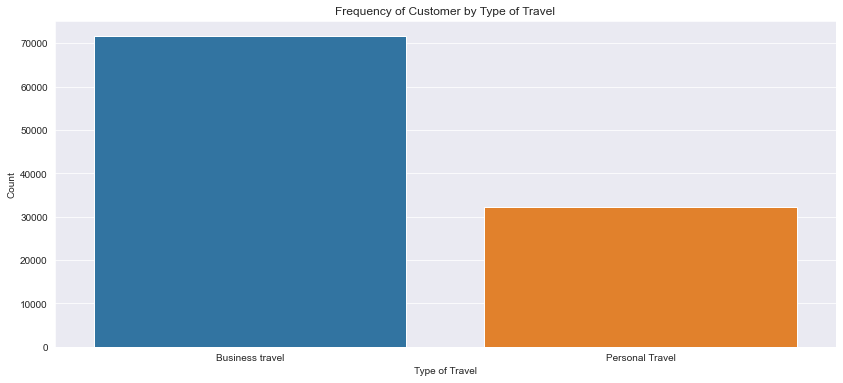

In [166]:
#Barplot for number of customers by Customer Type
bar_graph(features['Type of Travel'], 'Frequency of Customer by Type of Travel', 'Count', 'Type of Travel')

The Frequency of Customers by Type of Travel bar chart shows two type of travels, Business or Personal. The vast majority of
travels are for business. It Would be interesting to know how many of them would be domestic and international.

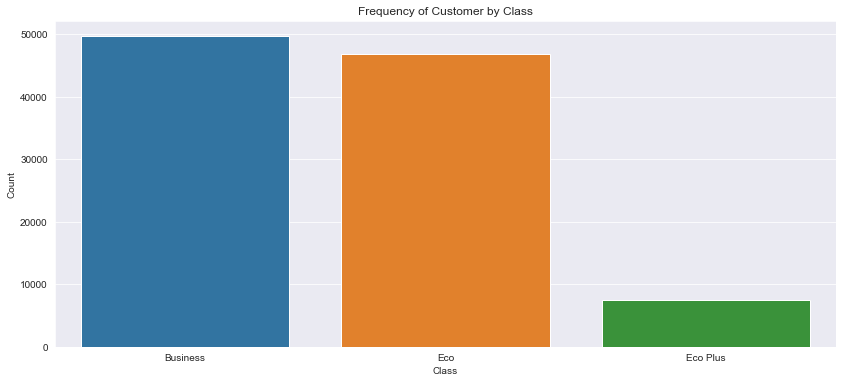

In [167]:
#Barplot for number of customers by Customer Type
bar_graph(features['Class'], 'Frequency of Customer by Class', 'Count', 'Class')

The Frequency of Customer by Class bar chart displays the various classes, Business, Eco and Eco Plus. The vast majority
customers fall either in the Business or Eco Class with very few in the Eco Plus. What's in the Eco Plus that isn't
appealing to consumers?

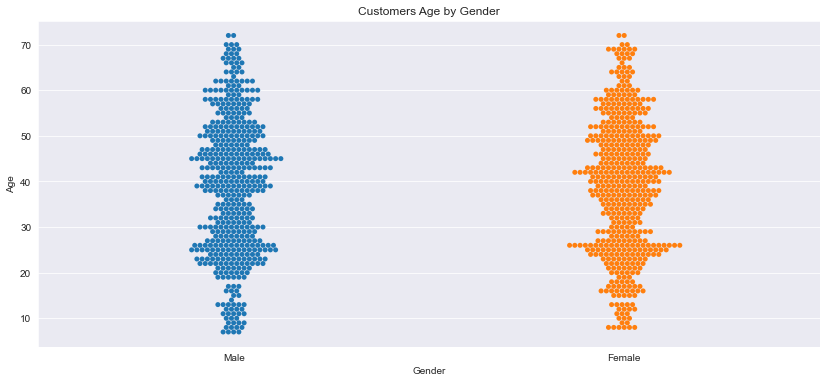

In [168]:
#Categorical scatter plot for Age by Gender
cat_scat_plot(features['Gender'], features['Age'], 'Customers Age by Gender', None)

The Categorical Scatter Plot for customers age by gender shows from early 20s to early 50s, most males will fly in this age
range and there is a similarity with females except around the mid 20s, there is a spike of female customers. Why are
more females flying at this around this age?

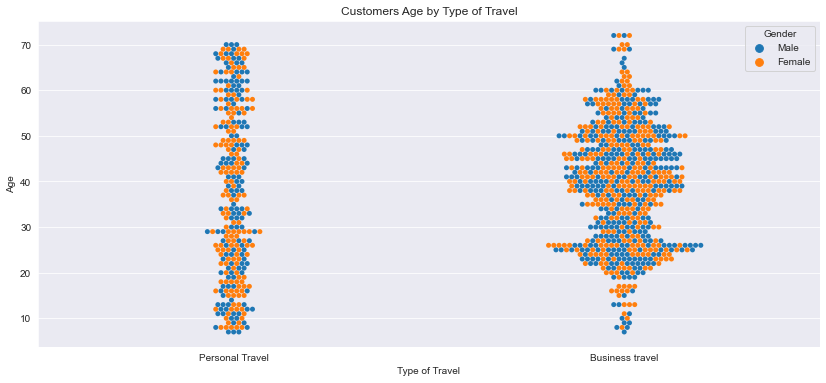

In [169]:
#Categorical scatter plot for Age by Type of Travel
cat_scat_plot(features['Type of Travel'], features['Age'], "Customers Age by Type of Travel", features['Gender'])

The Customers Age by Type of Travel displays the type of travel for each age. The majority of the travels are business
travels. There's a spike in business travels for customers in the approximate age of 25. The majority of business travels
are flown by customers in the age range of late 30s to early 50s.

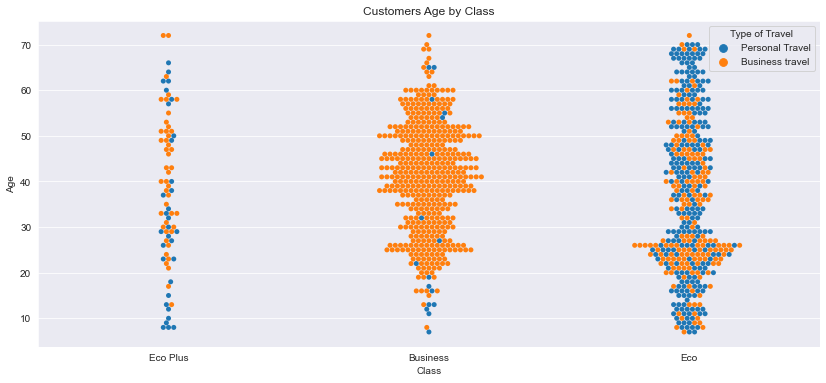

In [170]:
#Categorical scatter plot for Age by Class
cat_scat_plot(features['Class'], features['Age'], "Customers Age by Class", hue=features['Type of Travel'])

The Customers Age by Class displays the various classes flown by customers. As suspected, the majority of customers
who purchased business class are traveling for business. In Eco, it's mostly Personal Travel with some for Business
Travel. Eco Plus has a good mix but is not the most desirable class for consumers.

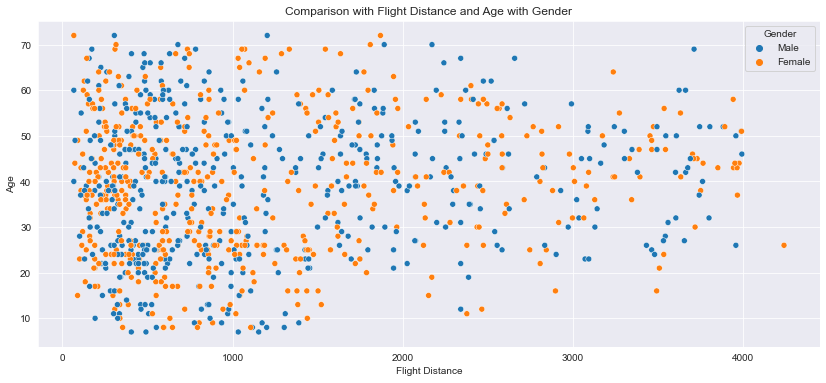

In [171]:
#Scatter plot for Flight Distance by Age and Gender
scatter_plot(features, 'Flight Distance', 'Age', 'Comparison with Flight Distance and Age with Gender', 'Gender')

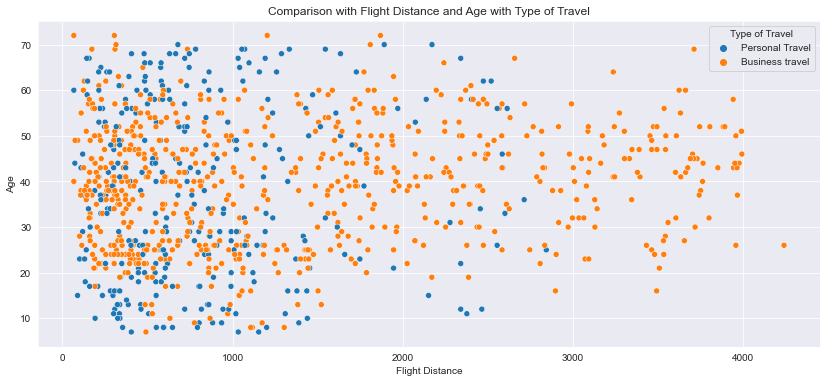

In [172]:
#Scatter plot for Flight Distance by Age and Type of Travel
scatter_plot(features, 'Flight Distance', 'Age', 'Comparison with Flight Distance and Age with Type of Travel', 'Type of Travel')

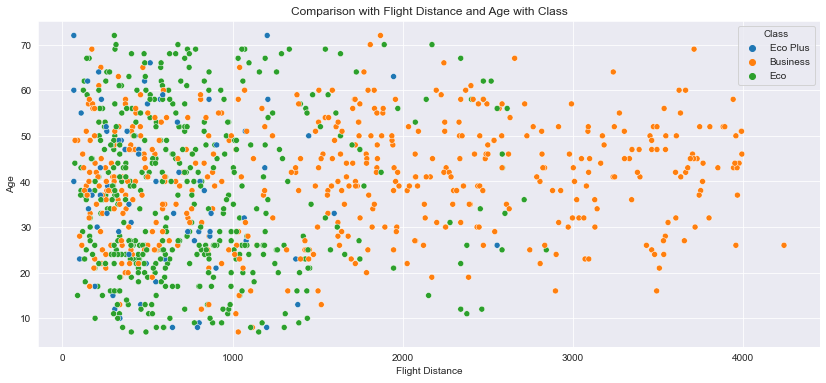

In [173]:
#Scatter plot for Flight Distance by Age and Class
scatter_plot(features, 'Flight Distance', 'Age', 'Comparison with Flight Distance and Age with Class', 'Class')

# Train a Model: Random Forest Classifier

Feature Engineering will be applied using Mutual Information to select the features holding the most information.
Applying the Random Forest Classifier then a Model Validation containing the confusion matrix.


In [174]:
X = features.copy()
y = target

In [175]:
# Label encoding for categoricals
for colname in X.select_dtypes(["object", 'float']):
    X[colname], _ = X[colname].factorize()

In [176]:
# Discrete features should now be integers
discrete_features = X.dtypes == 'int64'
print(discrete_features)

id                                   True
Gender                               True
Customer Type                        True
Age                                  True
Type of Travel                       True
Class                                True
Flight Distance                      True
Inflight wifi service                True
Departure/Arrival time convenient    True
Ease of Online booking               True
Gate location                        True
Food and drink                       True
Online boarding                      True
Seat comfort                         True
Inflight entertainment               True
On-board service                     True
Leg room service                     True
Baggage handling                     True
Checkin service                      True
Inflight service                     True
Cleanliness                          True
Departure Delay in Minutes           True
Arrival Delay in Minutes             True
dtype: bool


In [177]:
#Function to find Mutual Information Scores for Feature Selection
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[:6]

id                        0.684232
Online boarding           0.210858
Inflight wifi service     0.161702
Class                     0.133508
Type of Travel            0.113635
Inflight entertainment    0.093717
Name: MI Scores, dtype: float64

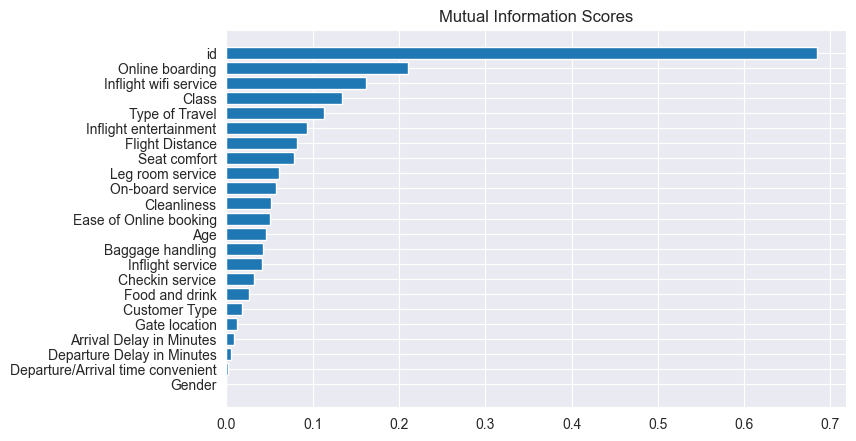

In [178]:
#Plotting Mutual Information Scores
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

Overall, the features are approximately close together. With id variable being the highest but it doesn't provide 
information about customer satisfaction. Therefore we'll test Online boarding, Inflight with service, Class, 
Type of travel, Inflight entertainment

In [179]:
#Select features through Mutual Information
selected_features = X[['Online boarding', 'Inflight wifi service', 'Class', 'Type of Travel', 'Inflight entertainment']]

In [180]:
#Split the train data to train and test
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.20, random_state = 0)

In [181]:
#Train model and apply the Random Forest Classifier
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(train_X, train_y)

RandomForestClassifier(random_state=1)

In [182]:
#Cross Validation Accuracy Scores 5-fold
score = cross_val_score(forest_model,
                        X, y,
                        cv=5,
                        scoring = 'accuracy'
)
print(score)
print(score.mean())

[0.96328377 0.96304316 0.96164766 0.96352437 0.96434071]
0.9631679355248759


Overall, each fold provided a similar accuracy score. There doesn't seem to be an issue here.

In [183]:
#Prediction of Customer Satisfaction
customer_predict = forest_model.predict(val_X)

In [184]:
#Model Validation: Confusion Matrix
cf_matrix_train = confusion_matrix(val_y, customer_predict)
tn,fp,fn,tp = cf_matrix_train.ravel()

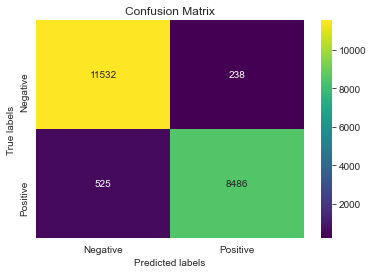

In [196]:
#Plot True Negative, False Positive, False Negative, True Positive

ax = plt.subplot()
sns.heatmap(cf_matrix_train , annot=True, fmt='d', cmap='viridis')
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Negative', 'Positive']);
ax.yaxis.set_ticklabels(['Negative', 'Positive']);
plt.show()

In [186]:
#Print Classification Report
print(classification_report(val_y, customer_predict))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     11770
              satisfied       0.97      0.94      0.96      9011

               accuracy                           0.96     20781
              macro avg       0.96      0.96      0.96     20781
           weighted avg       0.96      0.96      0.96     20781



The accuracy score is high, 96%. Recall and Precision with a weighted average of 96% for both.

# Time to apply the same process to the test.csv file and see if the results are similar

In [187]:
#Creating feature and target variables
X_test = test.copy().drop(['satisfaction'], axis=1)
y_test = test['satisfaction']

In [188]:
# Label encoding for categoricals
for colname in X_test.select_dtypes(["object", 'float']):
    X_test[colname], _ = X_test[colname].factorize()

In [189]:
# Discrete features should now be integers
discrete_features = X_test.dtypes == 'int64'
print(discrete_features)

id                                   True
Gender                               True
Customer Type                        True
Age                                  True
Type of Travel                       True
Class                                True
Flight Distance                      True
Inflight wifi service                True
Departure/Arrival time convenient    True
Ease of Online booking               True
Gate location                        True
Food and drink                       True
Online boarding                      True
Seat comfort                         True
Inflight entertainment               True
On-board service                     True
Leg room service                     True
Baggage handling                     True
Checkin service                      True
Inflight service                     True
Cleanliness                          True
Departure Delay in Minutes           True
Arrival Delay in Minutes             True
dtype: bool


In [190]:
#Using the same selected features in the train.csv file
selected_features_test = X_test[['Online boarding', 'Inflight wifi service', 'Class', 'Type of Travel', 'Inflight entertainment']]

In [191]:
#Train model and print mean absolute error
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(selected_features, y)
test_predict = forest_model.predict(selected_features_test)

In [192]:
#Model Validation: Confusion Matrix
cf_matrix_test = confusion_matrix(y_test, test_predict)


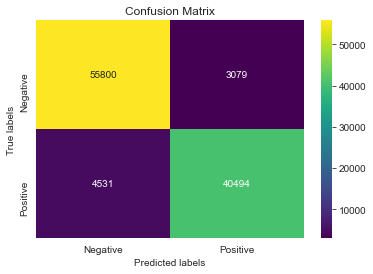

In [193]:
#Plot True Negative, False Positive, False Negative, True Positive
ax = plt.subplot()
sns.heatmap(cf_matrix_test, annot=True, fmt='d', cmap='viridis')
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Negative', 'Positive']);
ax.yaxis.set_ticklabels(['Negative', 'Positive']);
plt.show()

In [194]:
#Print Classification Report
print(classification_report(y_test, test_predict))


                         precision    recall  f1-score   support

neutral or dissatisfied       0.92      0.95      0.94     58879
              satisfied       0.93      0.90      0.91     45025

               accuracy                           0.93    103904
              macro avg       0.93      0.92      0.93    103904
           weighted avg       0.93      0.93      0.93    103904



The accuracy score is high, 93%. Recall and Precision with a weighted average of 93% for both.

In [195]:
train_accuracy = accuracy_score(val_y, customer_predict)
test_accuracy = accuracy_score(y_test, test_predict)
diff_accuracy = train_accuracy - test_accuracy
print("Train Accuracy: {:.2f} \n "
      "Test Accuracy: {:.2f} \n "
      "Accuracy Difference: {:.2f}".format(train_accuracy, test_accuracy, diff_accuracy))

Train Accuracy: 0.96 
 Test Accuracy: 0.93 
 Accuracy Difference: 0.04


The difference of accuracy is approximately 4%, so overall the models ran really well.
<br>

There doesn't seem to be a significant difference in the features, except id, but overall
Online boarding, Inflight wifi service, Class, Type of Travel and Inflight entertainment are a few of the top features
that tend to have a strong relationship with customer satisfaction.